# PRACTICA 21

El objetivo es analizar porqué los empleados deciden irse con la competencia y éste podría ser un desafío serio para un departamento de recursos humanos, el cual se podría abordar mediante modelos predictivos de Machine Learning. Las variables manejadas son: 

satisfaction_level: Nivel de satisfacción. 
    
last_evaluation: Puntaje obtenido en la ultima evaluación.
    
average_montly_hours: Promedio de horas trabajadas al mes.
    
time_spend_company: Tiempo del usuario en la compañía. 
    
work_accident: Si el empleado ha tenido algún accidente laboral (1 = Sí, 0 = No).
    
promotion_last_5years: Si el empleado ha sido promovido en los últimos 5 años.
    
sales: Departamento donde trabaja. 
    
salary: Categoría del salario. 
    
left: Variable a predecir y si el empleado dejó o no la empresa (1 = Sí, 0 = No).

Cargue la base de datos en Python y asegúrese de re-codificar las variables categóricas de manera pertinente antes de iniciar su análisis (Sugerencia: Use “pd.get_dummies”) 

Mediante un análisis exploratorio de datos determine si esta base de datos está equilibrada o no (de acuerdo a las categorías existentes). 

Use el método de K Vecinos más cercanos para generar un modelo predictivo. Para dicho fin, determine el valor óptimo de K evaluando distintas alternativas:    k = 1, 2, ...., 20 Asegúrese de respaldar su recomendación de la k óptima en base a una tabla que compare en cada caso las diversas precisiones comentadas en esta lección. 

Elabore un mapa de calor para la matriz de confusión asociada al valor óptimo de k. Interprete verbalmente cada resultado mostrado en dicha matriz. 

Obtenga e interprete la gráfica de la curva ROC para el valor óptimo de k.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
empleados = pd.read_csv('C:/Users/Isaac/Desktop/IHD/EBAC DT/M21 DS/recursos_humanos.csv')
empleados

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
empleados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
#  La función pd.unique nos dice los distintos valores presentes en la columna

pd.unique(empleados['sales'])

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [5]:
pd.unique(empleados['salary'])

array(['low', 'medium', 'high'], dtype=object)

In [6]:
pd.unique(empleados['left'])

array([1, 0], dtype=int64)

In [7]:
pd.unique(empleados ['promotion_last_5years'])

array([0, 1], dtype=int64)

In [8]:
# revisando la informacion del DF encontramos 2 columnas categoricas, necesitanos convertirlas a numericas para poder trabajar
# con la regresion

dummies_sales = pd.get_dummies(empleados['sales'], prefix = 'sales')
dummies_sales = dummies_sales.astype(int)
dummies_salary = pd.get_dummies(empleados['salary'], prefix = 'salary')
dummies_salary = dummies_salary.astype(int)

In [9]:
# unimos todo en un solo DF

empleados = pd.concat([empleados, dummies_sales], axis = 1)
empleados = pd.concat([empleados, dummies_salary], axis = 1)
empleados

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,...,0,0,0,0,0,1,0,0,1,0


In [10]:
# eliminamos las variables categoricas

empleados.drop(['sales','salary'], axis = 1, inplace = True)
empleados

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [11]:
quit_si = empleados[empleados.left == 1]
quit_no = empleados[empleados.left == 0]

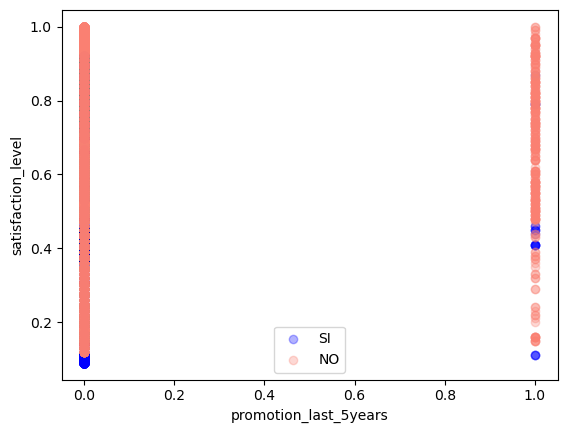

In [17]:
# creamos digarama de dispersion 

plt.scatter(quit_si.promotion_last_5years, quit_si.satisfaction_level, color = 'blue', label = 'SI', alpha = 0.3)
plt.scatter(quit_no.promotion_last_5years, quit_no.satisfaction_level, color = 'salmon', label = 'NO', alpha = 0.3)
plt.xlabel('promotion_last_5years')
plt.ylabel('satisfaction_level')
plt.legend()
plt.show()

In [25]:
# separamos y asignamos valores a las variables 'x' y 'y'

y = empleados.left.values
x_datos = empleados.drop(['left'], axis = 1)

In [26]:
# Normalizamos los datos

x = (x_datos- np.min(x_datos)) / (np.max(x_datos) - np.min(x_datos))
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.001226,0.001710,0.006452,0.506452,0.009677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003226,0.000000,0.0,0.0,0.003226,0.000000
1,0.002581,0.002774,0.016129,0.845161,0.019355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003226,0.000000,0.0,0.0,0.000000,0.003226
2,0.000355,0.002839,0.022581,0.877419,0.012903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003226,0.000000,0.0,0.0,0.000000,0.003226
3,0.002323,0.002806,0.016129,0.719355,0.016129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003226,0.000000,0.0,0.0,0.003226,0.000000
4,0.001194,0.001677,0.006452,0.512903,0.009677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003226,0.000000,0.0,0.0,0.003226,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.001290,0.001839,0.006452,0.487097,0.009677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003226,0.0,0.0,0.003226,0.000000
14995,0.001194,0.001548,0.006452,0.516129,0.009677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003226,0.0,0.0,0.003226,0.000000
14996,0.001194,0.001710,0.006452,0.461290,0.009677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003226,0.0,0.0,0.003226,0.000000
14997,0.000355,0.003097,0.019355,0.903226,0.012903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003226,0.0,0.0,0.003226,0.000000


In [27]:
# Creamos las BD de entrenamiento y Prueba

from sklearn.model_selection import train_test_split

Modelo KNN (K vecinos mas cercanos)

In [136]:
from sklearn.neighbors import KNeighborsClassifier

knnreg = KNeighborsClassifier(n_neighbors = 7)

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [138]:
# entrenamos el modelo

knnreg.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [139]:
# realizamos predicciones(pruebas)

knnregpred = knnreg.predict(x_test)

In [140]:
# imprimimos el score

print('Score: ', knnreg.score(x_test, y_test))

Score:  0.9384444444444444


In [141]:
# hacemos un cambio de variables para crear la matriz de confusion

y_pred = knnregpred
y_true = y_test

Creamos la matriz de confusion

In [142]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true, y_pred)
confmat

array([[3222,  194],
       [  83, 1001]], dtype=int64)

Visualizacion de Matriz de Confusion

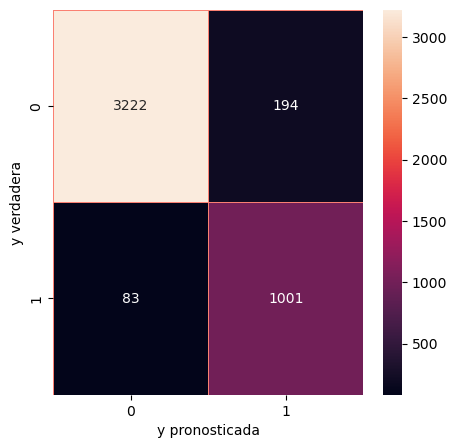

In [143]:
import seaborn as sns

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(confmat, annot = True, linewidths = 0.5, linecolor = 'salmon', fmt = '.0f', ax = ax)
plt.xlabel('y pronosticada')
plt.ylabel('y verdadera')
plt.show()

Calculamos los Indicadores

In [144]:
# Presicion Global

pred_cor = confmat[0,0] + confmat[1,1]
pred_inc = confmat[0,1] + confmat[1,0]

PG = pred_cor / (pred_cor + pred_inc)
PG

0.9384444444444444

In [145]:
# presision global de los pronosticos que No dejan la empresa

pres_noquit = confmat[0,0] / (confmat[0,0] + confmat[1,0])
pres_noquit

0.9748865355521936

El resultado nos indica que estamos correctos en el pronostico un 97.4%

In [146]:
# presision global de los pronosticos que SI dejan la empresa

pres_siquit = confmat[1,1] / (confmat[1,1] + confmat[0,1])
pres_siquit

0.8376569037656904

El resultado nos indica que estamos correctos en el pronostico un 83.7%

# Calculamos la curva ROC (Receiver Operating Characteristic)

In [147]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [148]:
# calculamos score

y_scores = knnreg.predict_proba(x_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:,1])
roc_auc = auc(fpr, tpr)

roc_auc

0.9711272976312901

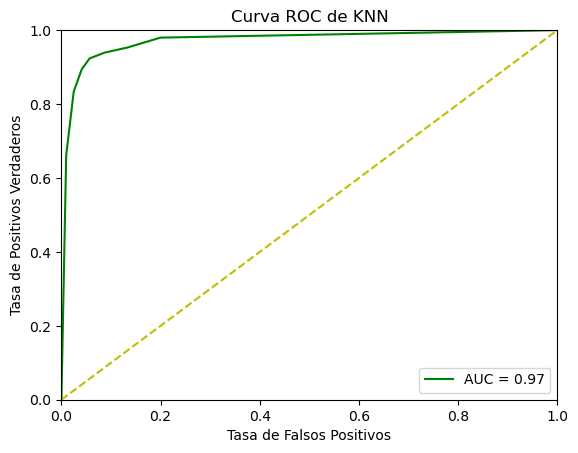

In [149]:
# graficamos

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'y--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Tasa de Positivos Verdaderos')
plt.xlabel('Tasa de Falsos Positivos')
plt.title('Curva ROC de KNN')
plt.show()